In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from distfit import distfit

In [3]:
df=pd.read_csv('C:\\Users\\josan\\Documents\\GitHub\\EDEM_MDA2324\\Alumnos\\ES\\Josan_Rodrigo_Cortes\\Estadística\\fifa_players.csv',delimiter=',')
df.head(5)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [21]:
df.columns


Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [4]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


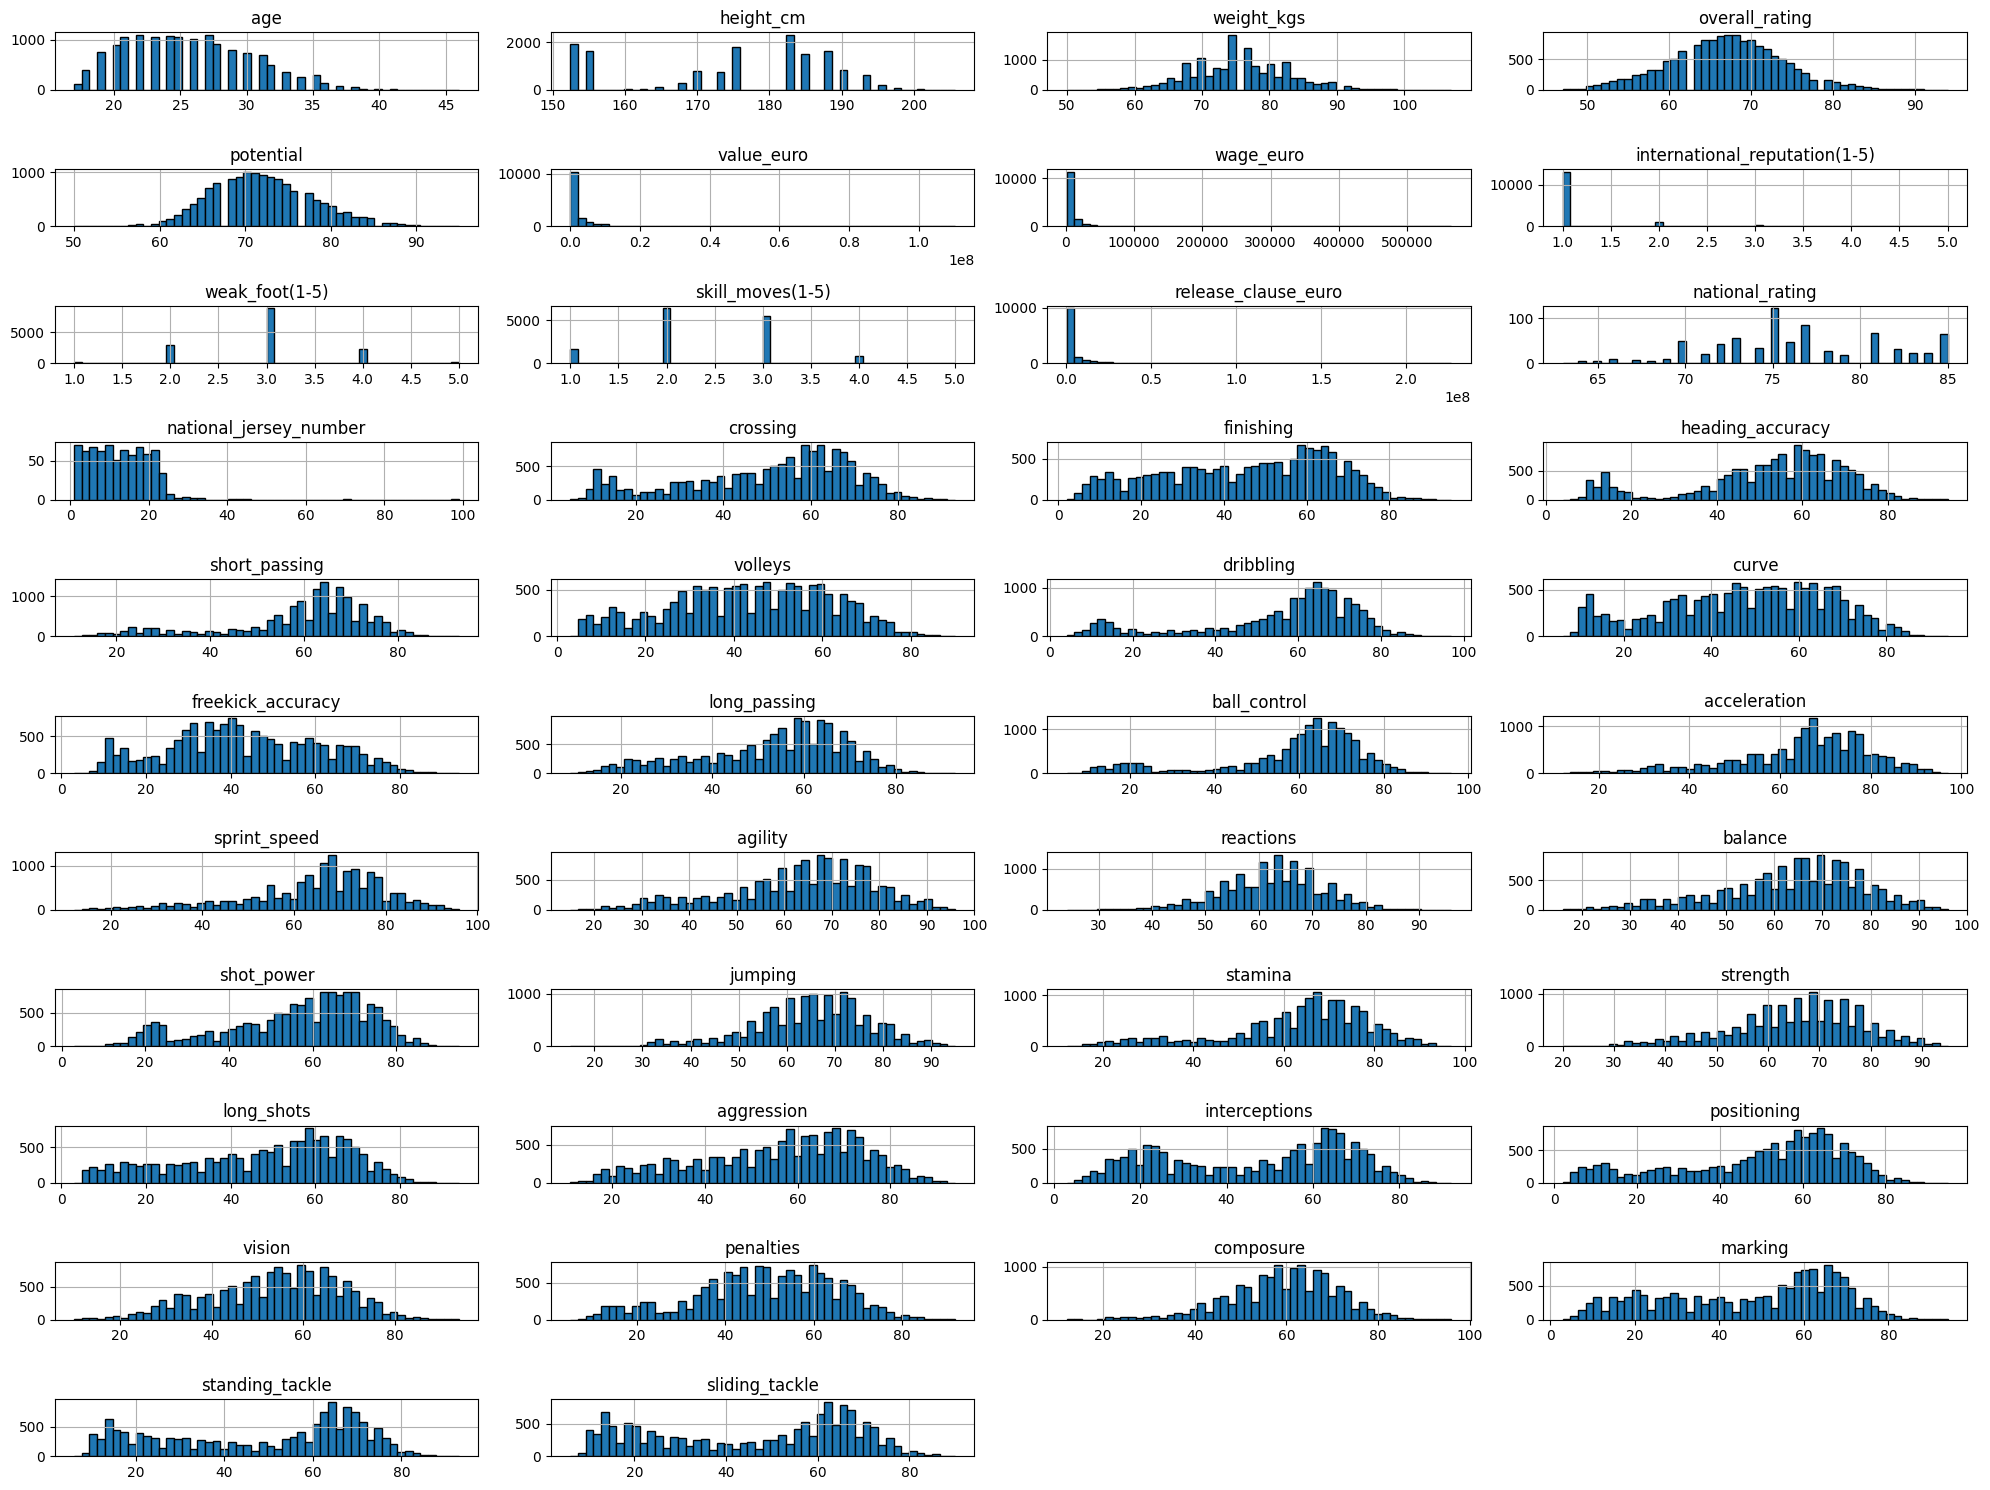

In [45]:
columns = df.columns

df.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

In [27]:
unique_values = df['nationality'].unique()
print(unique_values)

['Argentina' 'Denmark' 'France' 'Italy' 'Senegal' 'Netherlands' 'Germany'
 'Uruguay' 'Spain' 'Belgium' 'Egypt' 'Slovakia' 'Brazil' 'Croatia'
 'Costa Rica' 'Colombia' 'Morocco' 'Portugal' 'Sweden'
 'Bosnia Herzegovina' 'Mexico' 'England' 'Austria' 'Iceland' 'Hungary'
 'Wales' 'Ukraine' 'Central African Rep.' 'Serbia' 'Ivory Coast'
 'Cameroon' 'Paraguay' 'Australia' 'Algeria' 'Romania' 'Russia' 'Israel'
 'Switzerland' 'Chile' 'Tunisia' 'Turkey' 'Nigeria' 'Peru' 'Norway'
 'Greece' 'United States' 'Venezuela' 'Iran' 'Equatorial Guinea'
 'Cape Verde' 'Tanzania' 'Scotland' 'China PR' 'Kosovo' 'Montenegro'
 'Canada' 'Madagascar' 'Mali' 'Ghana' 'Guinea' 'Poland' 'Cuba'
 'Northern Ireland' 'Japan' 'New Zealand' 'South Africa'
 'Republic of Ireland' 'Ecuador' 'Burkina Faso' 'Czech Republic'
 'Slovenia' 'Belarus' 'Gabon' 'FYR Macedonia' 'Curacao' 'DR Congo'
 'Honduras' 'Sierra Leone' 'Guinea Bissau' 'Saudi Arabia' 'Fiji'
 'Korea Republic' 'Zambia' 'Syria' 'Armenia' 'Georgia' 'Angola' 'Zimbabwe'
 

In [33]:
import pandas as pd
import pycountry_convert as pc

In [35]:


# Suponiendo que tienes un DataFrame df con una columna 'country' que contiene los nombres de los países

# Definir una función para obtener el continente de un país
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Aplicar la función a la columna 'country' para obtener el continente correspondiente
df['continent'] = df['nationality'].apply(get_continent)

# Ahora, df contiene una nueva columna 'continent' que indica el continente al que pertenece cada país


In [36]:
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,continent
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,48,22,94,94,75,96,33,28,26,South America
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,46,56,84,91,67,88,59,57,22,Europe
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,78,64,82,88,82,87,63,67,67,Europe
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,34,26,83,87,61,83,51,24,22,Europe
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,87,88,24,49,33,80,91,88,87,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,69,41,60,64,63,56,40,20,18,None
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,62,55,42,39,32,52,53,64,60,Europe
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,27,10,5,25,16,47,9,12,13,Europe
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,38,15,54,52,50,53,16,18,17,Asia


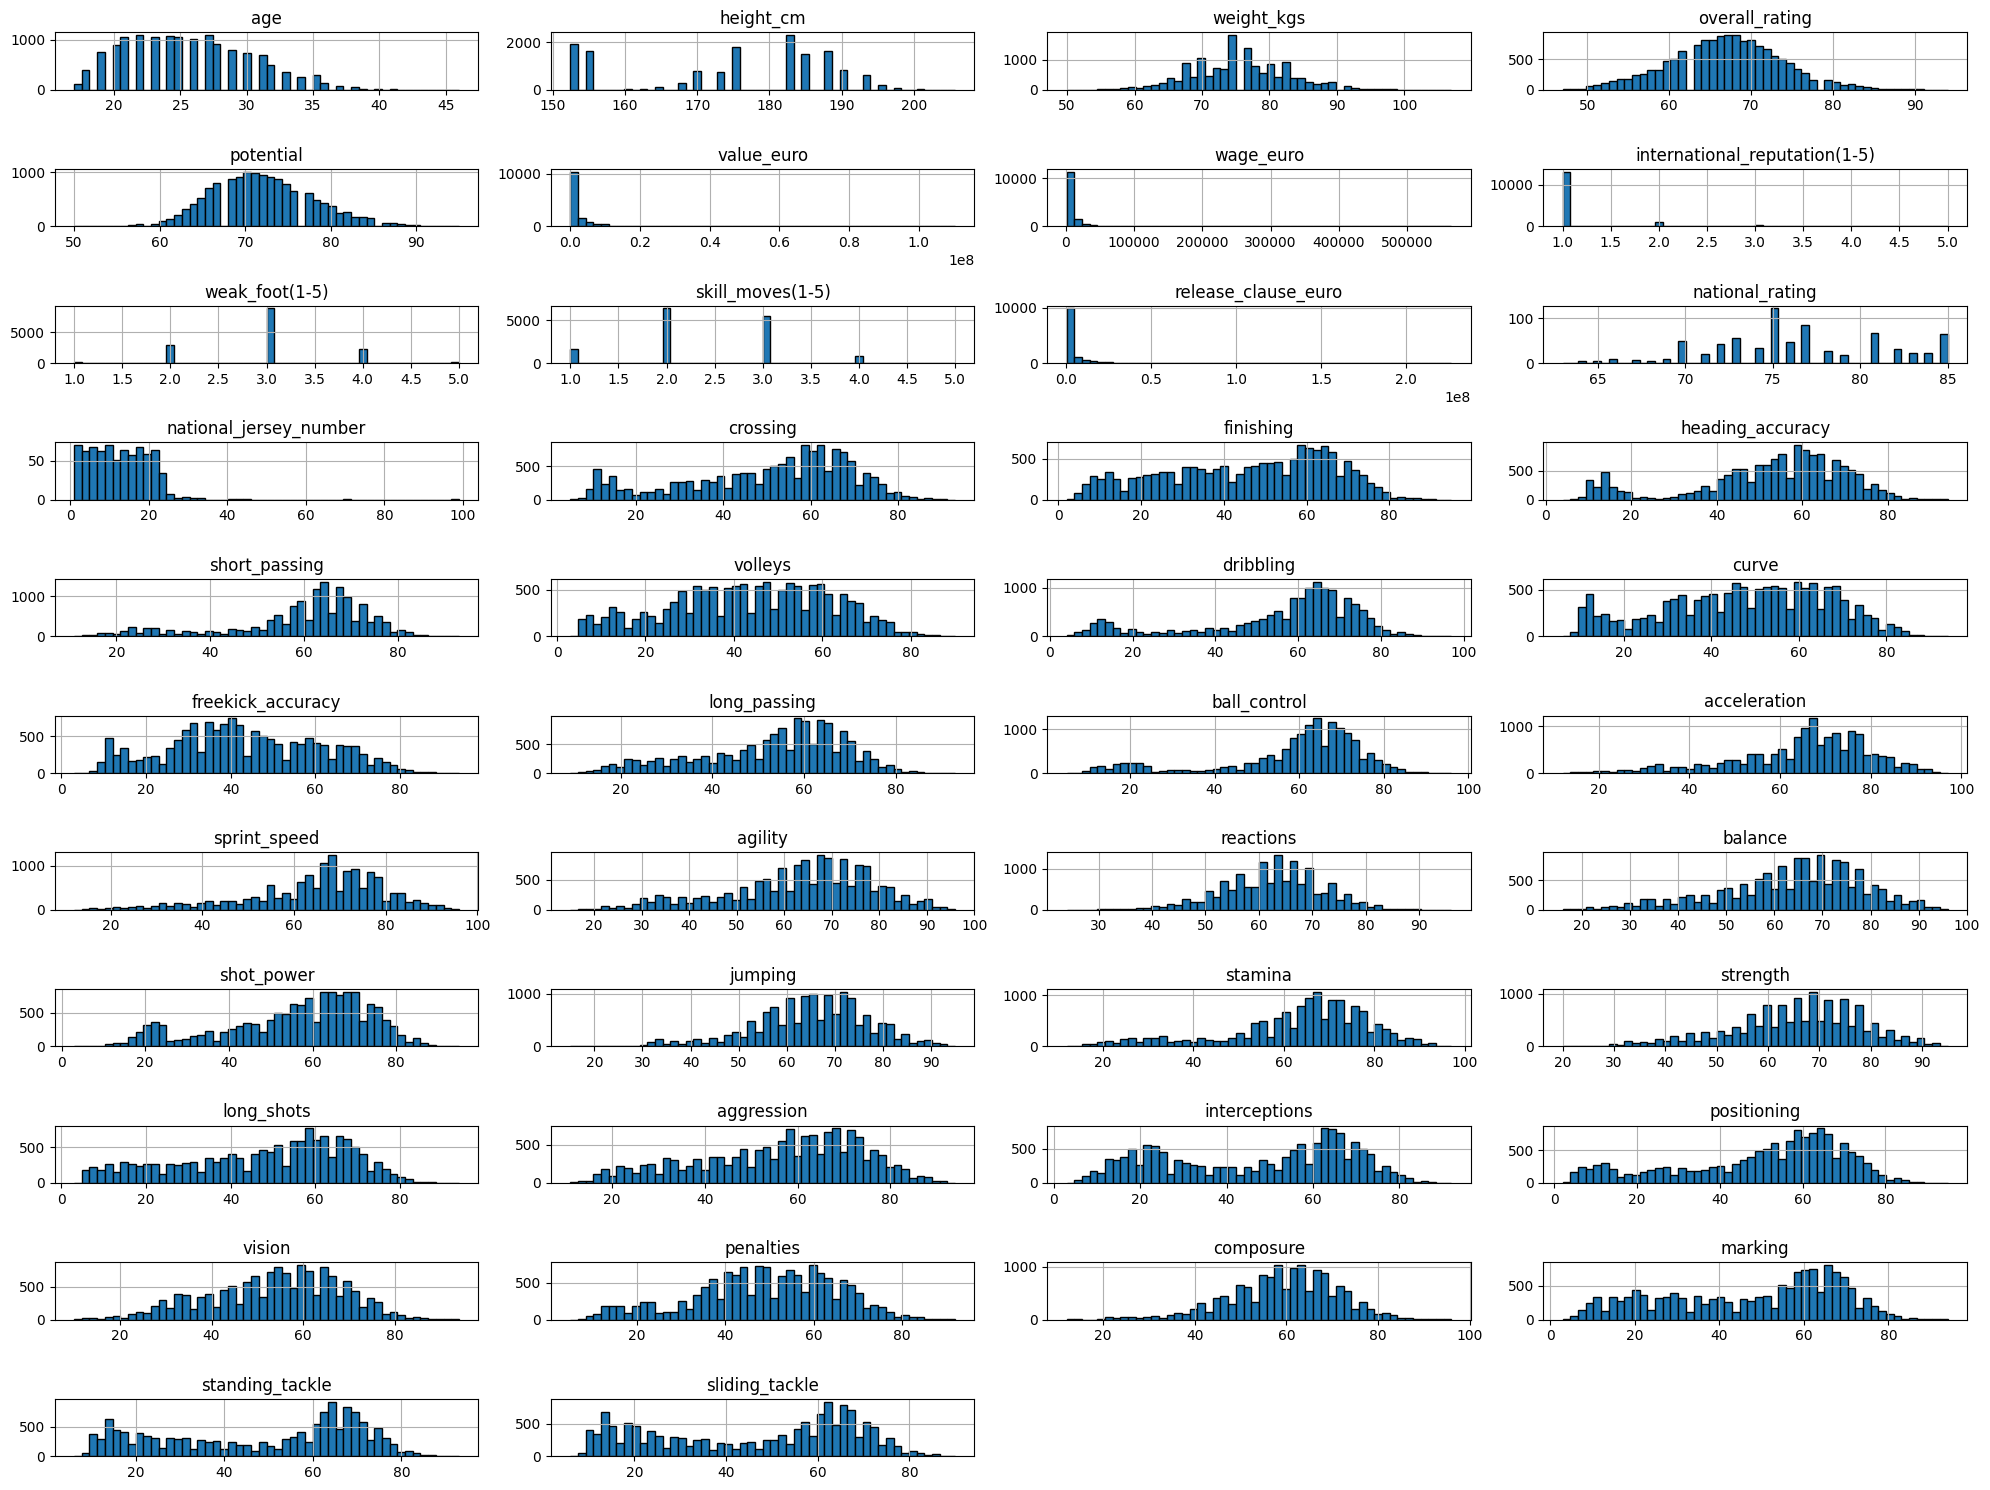

In [46]:
columns = df.columns

df.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

In [39]:
unique_values = df['continent'].unique()
print(unique_values)

['South America' 'Europe' 'Africa' 'North America' None 'Oceania' 'Asia']


In [41]:
df = df.dropna(subset=['continent'])
unique_values = df['continent'].unique()
print(unique_values)

['South America' 'Europe' 'Africa' 'North America' 'Oceania' 'Asia']


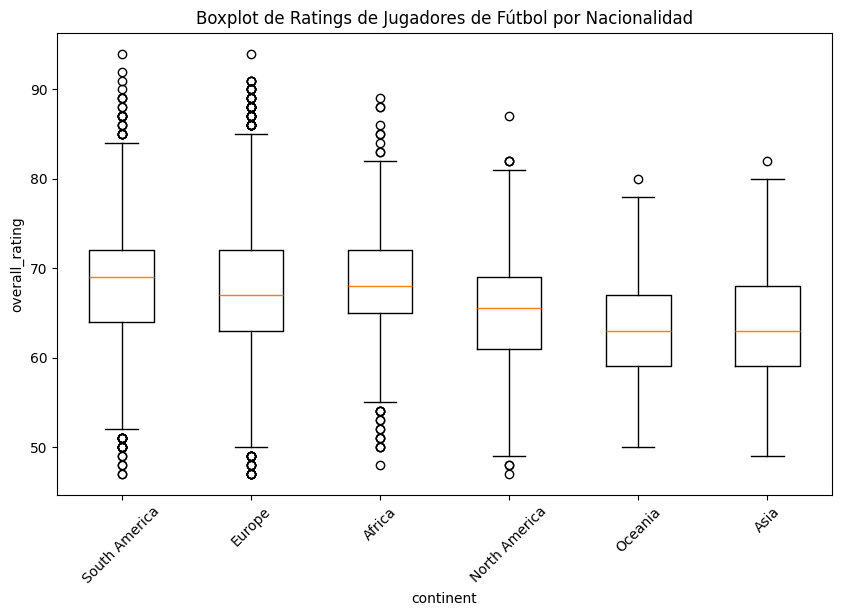

In [42]:


# Crear un boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['continent'] == nationality]['overall_rating'] for nationality in df['continent'].unique()], 
            labels=df['continent'].unique())
plt.xlabel('continent')
plt.ylabel('overall_rating')
plt.title('Boxplot de Ratings de Jugadores de Fútbol por Nacionalidad')
plt.xticks(rotation=45)
plt.show()


In [55]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,1.424800e+04,14253.000000,14496.000000,14496.000000,14496.000000,...,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000,14496.000000
mean,25.628794,175.023978,75.481892,66.955160,72.011038,2.762743e+06,10386.023995,1.124655,2.956540,2.391280,...,47.480891,56.016970,47.003104,50.228477,53.775800,48.785458,59.272351,47.489928,47.999586,45.978339
std,4.681741,13.947905,7.151461,6.849744,5.949449,6.039033e+06,23028.521553,0.415610,0.668134,0.779111,...,19.646055,17.538367,21.147689,19.975645,14.332833,15.927866,11.738759,20.372130,22.024972,21.623562
min,17.000000,152.400000,49.900000,47.000000,50.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,6.000000,6.000000
25%,22.000000,165.100000,69.900000,63.000000,68.000000,3.750000e+05,1000.000000,1.000000,3.000000,2.000000,...,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,52.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,67.000000,72.000000,8.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,52.000000,59.000000,53.000000,55.000000,55.000000,50.000000,60.000000,53.000000,55.000000,53.000000
75%,29.000000,185.420000,79.800000,71.000000,76.000000,2.500000e+06,10000.000000,1.000000,3.000000,3.000000,...,63.000000,70.000000,65.000000,65.000000,64.250000,61.000000,68.000000,64.250000,67.000000,65.000000
max,46.000000,205.740000,107.000000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.034634] [loc=66.955 scale=6.850]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0767882] [loc=47.000 scale=19.955]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.0767882] [loc=-4294967249.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.0365272] [loc=66.558 scale=5.831]
[distfit] >INFO> [t         ] [1.17 sec] [RSS: 0.0345666] [loc=66.952 scale=6.700]
[distfit] >INFO> [genextreme] [0.45 sec] [RSS: 0.0353982] [loc=64.332 scale=6.780]
[distfit] >INFO> [gamma     ] [0.28 sec] [RSS: 0.0346764] [loc=-323.808 scale=0.120]
[distfit] >INFO> [lognorm   ] [0.01 sec] [RSS: 0.034675] [loc=-532.976 scale=599.892]
[distfit] >INFO> [beta      ] [0.47 sec] [RSS: 0.0347021] [loc=-191.726 scale=857862.661]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0660605] [loc=47.000 scale=47.000]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 0.0346148] [loc=-1340.990 scale=206.809]
[di

          name     score           loc          scale  \
0            t  0.034567     66.951764       6.700384   
1     loggamma  0.034615  -1340.989679     206.808831   
2         norm  0.034634      66.95516       6.849508   
3      lognorm  0.034675   -532.976158     599.892221   
4        gamma  0.034676   -323.808283       0.120062   
5         beta  0.034702   -191.725924  857862.660551   
6   genextreme  0.035398     64.331863       6.779752   
7     dweibull  0.036527     66.558092       5.831256   
8      uniform  0.066061          47.0           47.0   
9       pareto  0.076788 -4294967249.0   4294967296.0   
10       expon  0.076788          47.0       19.95516   

                                        arg  \
0                       (46.2785791710783,)   
1                       (905.486319525809,)   
2                                        ()   
3                   (0.011416715628033852,)   
4                      (3254.664230223365,)   
5   (1424.9130353440576, 4723996.

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=46.2786, loc=66.9518, scale=6.70038)'}, xlabel='Values', ylabel='Frequency'>)

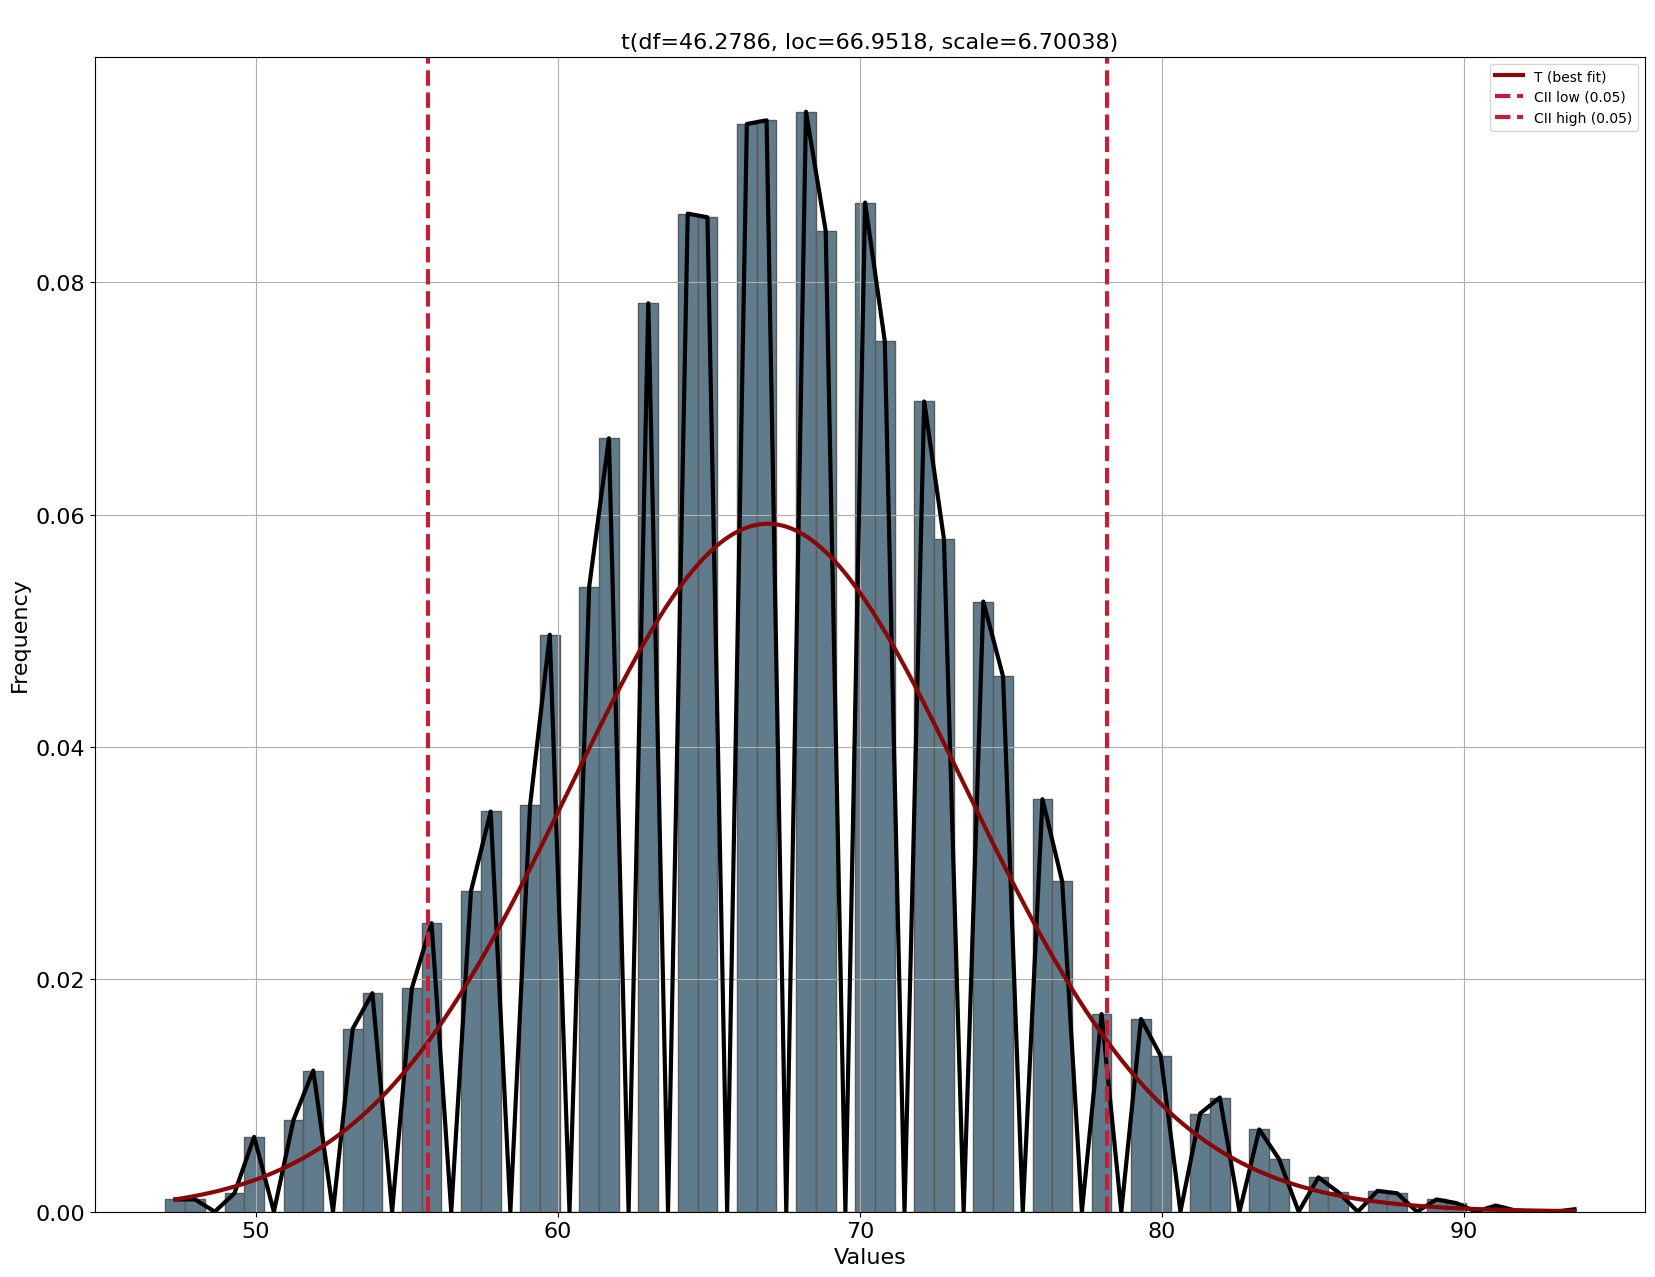

In [64]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your BMI data
dist.fit_transform(df['overall_rating'])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

In [49]:
from itertools import combinations
from scipy.stats import ttest_ind

In [59]:
from scipy.stats import levene

# Agrupar los datos por continente y calcular la varianza de 'overall_rating' para cada grupo
grouped = df.groupby('continent')['overall_rating'].apply(list)

# Convertir los datos en una lista de listas
data = [group for group in grouped]

# Aplicar la prueba de Levene desempaquetando los datos
statistic, p_value = levene(*data)

# Imprimir los resultados
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)




Estadístico de Levene: 11.620993408965496
Valor p: 3.153276520085977e-11


In [60]:
# Group by nationality
continent_groups = df.groupby("continent")

# Create all unique pairs of nationalities
continent_pairs = list(combinations(continent_groups.groups.keys(), 2))

# Initialize a list to store t-test results
t_test_cont_results = []

# Conduct t-test on each pair
for cont1, cont2 in continent_pairs:
    data1 = continent_groups.get_group(cont1)['overall_rating']
    data2 = continent_groups.get_group(cont2)['overall_rating']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # Assuming unequal variance
    t_test_cont_results.append((cont1, cont2, t_stat, p_value))

# Convert the results to a DataFrame for better readability
t_test_cont_results_df = pd.DataFrame(t_test_cont_results, columns=['Continent 1', 'Continent 2', 'T-Statistic', 'P-Value'])

# Display the DataFrame
print(t_test_cont_results_df)  # Display the first few rows as an example

      Continent 1    Continent 2  T-Statistic        P-Value
0          Africa           Asia    19.433209   3.736228e-78
1          Africa         Europe     4.679005   2.924720e-06
2          Africa  North America    11.279532   1.176854e-28
3          Africa        Oceania    14.039774   4.901628e-42
4          Africa  South America    -0.034723   9.723022e-01
5            Asia         Europe   -18.087487   7.229814e-72
6            Asia  North America    -6.429945   1.578267e-10
7            Asia        Oceania     1.661279   9.686700e-02
8            Asia  South America   -21.992531  1.036005e-101
9          Europe  North America     8.307650   1.122335e-16
10         Europe        Oceania    10.704181   1.460204e-26
11         Europe  South America    -7.004471   2.624221e-12
12  North America        Oceania     5.782327   9.490441e-09
13  North America  South America   -12.205193   1.156498e-33
14        Oceania  South America   -13.467348   2.592108e-40


In [65]:
# Group by positions
# Note: Since players can have multiple positions, this example assumes you're
# interested in their primary position. Adjust accordingly if needed.
df['primary_position'] = df['positions'].apply(lambda x: x.split(',')[0])
position_groups = df.groupby("primary_position")

# Create all unique pairs of positions
position_pairs = list(combinations(position_groups.groups.keys(), 2))

# Initialize a list to store t-test results
t_test_results_positions = []

# Conduct t-test on each pair
for pos1, pos2 in position_pairs:
    data1 = position_groups.get_group(pos1)['overall_rating']
    data2 = position_groups.get_group(pos2)['overall_rating']
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)  # Assuming unequal variance
    t_test_results_positions.append((pos1, pos2, t_stat, p_value))

# Convert the results to a DataFrame for better readability
t_test_results_positions_df = pd.DataFrame(t_test_results_positions, columns=['Position 1', 'Position 2', 'T-Statistic', 'P-Value'])

# Display the DataFrame
print(t_test_results_positions_df.head())  # Display the first few rows as an example

  Position 1 Position 2  T-Statistic       P-Value
0        CAM         CB     1.071071  2.843154e-01
1        CAM        CDM    -0.744075  4.569284e-01
2        CAM         CF    -0.966518  3.364389e-01
3        CAM         CM     3.951542  8.050987e-05
4        CAM         GK     8.637739  1.183974e-17


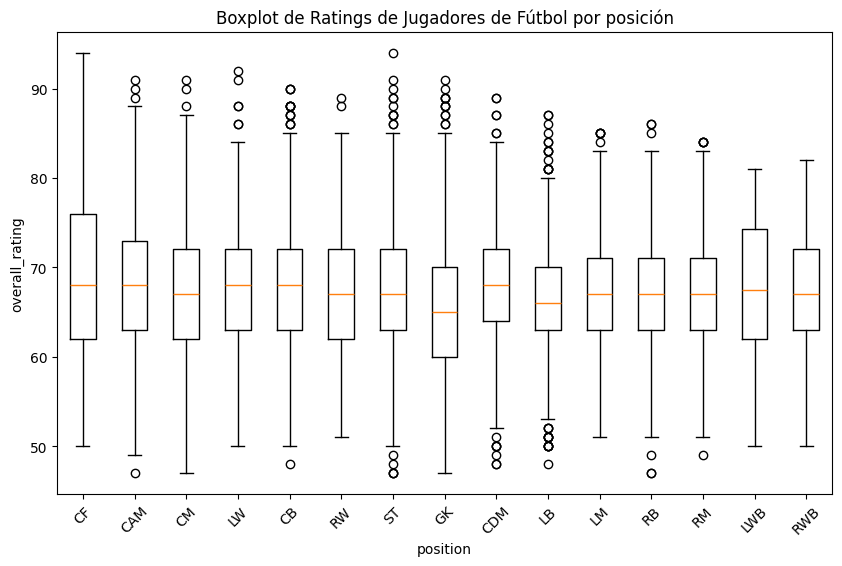

In [63]:
# Boxplot by primary positions
#fifa_all = fifa_all.dropna(subset=['primary_position'])
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['primary_position'] == primary_position]['overall_rating'] for primary_position in df['primary_position'].unique()], 
            labels=df['primary_position'].unique())
plt.xlabel('position')
plt.ylabel('overall_rating')
plt.title('Boxplot de Ratings de Jugadores de Fútbol por posición')
plt.xticks(rotation=45)
plt.show()

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('overall_rating ~ continent',                 # Model formula
            data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq       df           F         PR(>F)
continent   30811.257123      5.0  137.523224  5.932954e-143
Residual   649279.596906  14490.0         NaN            NaN


Como el p valor es muy pequeño, menor que 0.05, rechazamos la hipotesis nula de que las medias de ratings de los jugadores de los diferentes continentes son iguales.

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('overall_rating ~ positions',                 # Model formula
            data = df).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq       df        F        PR(>F)
positions   87651.731009    889.0  2.14884  1.648079e-70
Residual   782952.658876  17064.0      NaN           NaN
